In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

pd.set_option('display.max_columns', None)

## Reading the data

In [2]:

# Load the dataset
leads_data = pd.read_csv('Lead Scoring Assignment/Leads.csv')

In [3]:
# Exploring categorical variables
categorical_cols = ['Lead Origin', 'Lead Source','Do Not Email','Do Not Call', 'Last Activity', 'Country', \
                    'Specialization', 
                    'How did you hear about X Education', 
                    'What is your current occupation', \
                    'What matters most to you in choosing a course','Search','Magazine','Newspaper Article', \
                    'X Education Forums','Digital Advertisement','Through Recommendations',\
                    'Receive More Updates About Our Courses',
                    'Tags', 
                    'Lead Quality',\
                    'Update me on Supply Chain Content',\
                    'Get updates on DM Content',\
                    'Lead Profile', \
                    'Newspaper',
                    'City',
                    'Asymmetrique Activity Index',
                    'Asymmetrique Profile Index',
                    'I agree to pay the amount through cheque','A free copy of Mastering The Interview',\
                    'Last Notable Activity']

## replacing "Select" with null( probable reason -  user has not selected anything in this website dropdown)

In [4]:
# Handling 'Select' levels in categorical variables
leads_data[categorical_cols] = leads_data[categorical_cols].replace('Select', np.nan)

## Display general information about the dataset

In [5]:

print("Dataset Information:")
print(leads_data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit           

## removing this since these are directly related to conversion
## higher lead quality is based on data and intuition of employee, hence it can be skipped
## lead profile assigned is what the model has to quantify, Hence, it should be removed

In [6]:
leads_data = leads_data.drop(["Lead Quality", "Lead Profile"], axis=1)

## Calculate the percentage of missing values for each column

In [7]:
missing_percentage = (leads_data.isnull().sum() / len(leads_data)) * 100

# Display percentage of columns with null values
print("\nPercentage of Columns with Missing Values:")
print(missing_percentage[missing_percentage > 0])


Percentage of Columns with Missing Values:
Lead Source                                       0.389610
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
City                                             39.707792
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Score                       45.649351
dtype: float64


## Dropping ID columns, since they are arbitrary values and have no use in modelling

In [8]:
leads_data = leads_data.drop(['Prospect ID', 'Lead Number'], axis=1)

In [9]:
# Data analysis
# Checking the conversion rate
conversion_rate = leads_data['Converted'].mean()
print(f"Conversion Rate: {conversion_rate}")

Conversion Rate: 0.3853896103896104


## Exploring numeric variables

In [10]:

numeric_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
print("Numeric Variable Summary Statistics:")
print(leads_data[numeric_cols].describe())

Numeric Variable Summary Statistics:
       TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9103.000000                  9240.000000           9103.000000
mean      3.445238                   487.698268              2.362820
std       4.854853                   548.021466              2.161418
min       0.000000                     0.000000              0.000000
25%       1.000000                    12.000000              1.000000
50%       3.000000                   248.000000              2.000000
75%       5.000000                   936.000000              3.000000
max     251.000000                  2272.000000             55.000000


<Axes: >

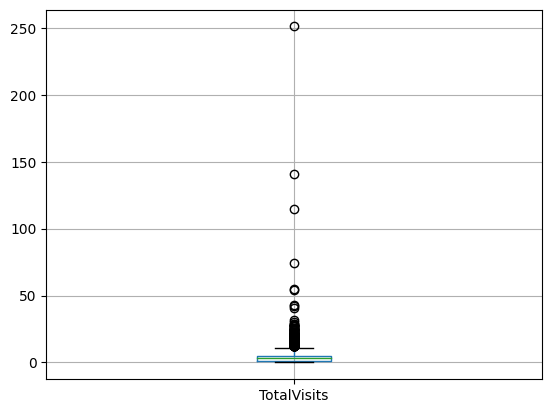

In [11]:
leads_data.boxplot(column=['TotalVisits'])

## exploring categorical variables

In [12]:


# Exploring categorical variables
categorical_cols = ['Lead Origin', 'Lead Source','Do Not Email','Do Not Call', 'Last Activity', 'Country', \
                    'Specialization', 
                    'How did you hear about X Education', 
                    'What is your current occupation', \
                    'What matters most to you in choosing a course','Search','Magazine','Newspaper Article', \
                    'X Education Forums','Digital Advertisement','Through Recommendations',\
                    'Receive More Updates About Our Courses',
                    'Tags', 
                    #'Lead Quality',\
                    'Update me on Supply Chain Content',\
                    'Get updates on DM Content',\
                    #'Lead Profile', \
                    'Newspaper',
                    'City',
                    'Asymmetrique Activity Index',
                    'Asymmetrique Profile Index',
                    'I agree to pay the amount through cheque','A free copy of Mastering The Interview',\
                    'Last Notable Activity']

print("Categorical Variable Value Counts:")
for col in categorical_cols:
    print(f"{col}:")
    print(leads_data[col].value_counts())
    print()

Categorical Variable Value Counts:
Lead Origin:
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

Lead Source:
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

Do Not Email:
No     8506
Yes     734
Name: Do Not Email, dtype: int64

Do Not Call:
No     9238
Yes       2
Name: Do Not Call, dtype: int64

Last Activity:
Email Open

In [13]:
# Drop columns with more than 30% null values
null_threshold = len(leads_data) * 0.3
leads_data = leads_data.dropna(axis=1, thresh=null_threshold)

In [14]:
# Calculate the percentage of missing values for each column
missing_percentage = (leads_data.isnull().sum() / len(leads_data)) * 100

# Display percentage of columns with null values
print("\nPercentage of Columns with Missing Values:")
print(missing_percentage[missing_percentage > 0])



Percentage of Columns with Missing Values:
Lead Source                                       0.389610
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
City                                             39.707792
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Score                       45.649351
dtype: float64


In [15]:
#removing since more than 30% are null values
leads_data = leads_data.drop(["Asymmetrique Activity Index"], axis=1)
leads_data = leads_data.drop(["Asymmetrique Profile Index"], axis=1)
leads_data = leads_data.drop(["Asymmetrique Activity Score"], axis=1)
leads_data = leads_data.drop(["Asymmetrique Profile Score"], axis=1)

# leads_data = leads_data.drop(["How did you hear about X Education"], axis=1)
leads_data = leads_data.drop(["Tags"], axis=1)

In [16]:
# Calculate the percentage of missing values for each column
missing_percentage = (leads_data.isnull().sum() / len(leads_data)) * 100

# Display percentage of columns with null values
print("\nPercentage of Columns with Missing Values:")
print(missing_percentage[missing_percentage > 0])



Percentage of Columns with Missing Values:
Lead Source                                       0.389610
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
City                                             39.707792
dtype: float64


## checking specialisation column

In [17]:
leads_data.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

## this columns looks like an important feature, hence we should not drop it

In [18]:
# # Fill null Specialization with "Unknown"
leads_data['Specialization'].fillna('Unknown', inplace=True)

## recalculate null percentage columns

In [19]:
# Calculate the percentage of missing values for each column
missing_percentage = (leads_data.isnull().sum() / len(leads_data)) * 100

# Display percentage of columns with null values
print("\nPercentage of Columns with Missing Values:")
print(missing_percentage[missing_percentage > 0])

leads_data_encoded = pd.get_dummies(leads_data,columns=[col for col in categorical_cols if col in leads_data.columns], drop_first=True)
leads_data_encoded.head()


Percentage of Columns with Missing Values:
Lead Source                                       0.389610
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
City                                             39.707792
dtype: float64


,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Newspaper_Yes,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,

In [20]:
leads_data['Page Views Per Visit'].value_counts()/leads_data.shape[0]

0.00    0.236905
2.00    0.194264
3.00    0.129437
4.00    0.096970
1.00    0.070455
          ...   
3.43    0.000108
2.56    0.000108
6.33    0.000108
1.64    0.000108
2.08    0.000108
Name: Page Views Per Visit, Length: 114, dtype: float64

In [21]:
max(leads_data['Page Views Per Visit'].value_counts()/leads_data.shape[0])

0.2369047619047619

In [22]:
leads_data['TotalVisits'].value_counts()/leads_data.shape[0]

0.0      0.236905
2.0      0.181818
3.0      0.141342
4.0      0.121212
5.0      0.084740
6.0      0.050433
1.0      0.042749
7.0      0.033442
8.0      0.024242
9.0      0.017749
10.0     0.012338
11.0     0.009307
13.0     0.005195
12.0     0.004870
14.0     0.003896
16.0     0.002273
15.0     0.001948
17.0     0.001732
18.0     0.001623
20.0     0.001299
19.0     0.000974
21.0     0.000649
23.0     0.000649
24.0     0.000541
25.0     0.000541
27.0     0.000541
22.0     0.000325
29.0     0.000216
28.0     0.000216
26.0     0.000216
141.0    0.000108
55.0     0.000108
30.0     0.000108
43.0     0.000108
74.0     0.000108
41.0     0.000108
54.0     0.000108
115.0    0.000108
251.0    0.000108
32.0     0.000108
42.0     0.000108
Name: TotalVisits, dtype: float64

## 23% leads have not visted the website and the null percentage is less than 2%, hence it can be imputed using mode

## 23% leads have no pageviews when visiting the website and the null percentage is less than 2%, hence it can be imputed using mode

In [23]:
# Fill TotalVisits and Page Views Per Visit with mode()
leads_data['TotalVisits'].fillna(leads_data['TotalVisits'].mode()[0], inplace=True)
leads_data['Page Views Per Visit'].fillna(leads_data['Page Views Per Visit'].mode()[0], inplace=True)



In [24]:
# Calculate the percentage of missing values for each column
missing_percentage = (leads_data.isnull().sum() / len(leads_data)) * 100

# Display percentage of columns with null values
print("\nPercentage of Columns with Missing Values:")
print(missing_percentage[missing_percentage > 0])

leads_data_encoded = pd.get_dummies(leads_data,columns=[col for col in categorical_cols if col in leads_data.columns], drop_first=True)
leads_data_encoded.head()


Percentage of Columns with Missing Values:
Lead Source                                       0.389610
Last Activity                                     1.114719
Country                                          26.634199
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
City                                             39.707792
dtype: float64


,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Newspaper_Yes,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,

In [25]:

leads_data["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

## this column is biased towards better career prospects, hence we can drop this

In [26]:
leads_data = leads_data.drop(["What matters most to you in choosing a course"], axis=1)

In [27]:
# Calculate the percentage of missing values for each column
missing_percentage = (leads_data.isnull().sum() / len(leads_data)) * 100

# Display percentage of columns with null values
print("\nPercentage of Columns with Missing Values:")
print(missing_percentage[missing_percentage > 0])

leads_data_encoded = pd.get_dummies(leads_data,columns=[col for col in categorical_cols if col in leads_data.columns], drop_first=True)
leads_data_encoded.head()


Percentage of Columns with Missing Values:
Lead Source                         0.389610
Last Activity                       1.114719
Country                            26.634199
What is your current occupation    29.112554
City                               39.707792
dtype: float64


,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Newspaper_Yes,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,

In [28]:

leads_data["What is your current occupation"].value_counts()/leads_data.shape[0]

Unemployed              0.606061
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

## this columns has approx 60% unemployed value and 29% null values, hence this can be dropped

In [29]:
leads_data = leads_data.drop(["What is your current occupation"], axis=1)

In [30]:
# Calculate the percentage of missing values for each column
missing_percentage = (leads_data.isnull().sum() / len(leads_data)) * 100

# Display percentage of columns with null values
print("\nPercentage of Columns with Missing Values:")
print(missing_percentage[missing_percentage > 0])

leads_data_encoded = pd.get_dummies(leads_data,columns=[col for col in categorical_cols if col in leads_data.columns], drop_first=True)
leads_data_encoded.head()


Percentage of Columns with Missing Values:
Lead Source       0.389610
Last Activity     1.114719
Country          26.634199
City             39.707792
dtype: float64


,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Newspaper_Yes,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [31]:
leads_data['Country'].value_counts()/leads_data.shape[0]

India                   0.702597
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Hong Kong               0.000758
Bahrain                 0.000758
Oman                    0.000649
France                  0.000649
unknown                 0.000541
South Africa            0.000433
Nigeria                 0.000433
Germany                 0.000433
Kuwait                  0.000433
Canada                  0.000433
Sweden                  0.000325
China                   0.000216
Asia/Pacific Region     0.000216
Uganda                  0.000216
Bangladesh              0.000216
Italy                   0.000216
Belgium                 0.000216
Netherlands             0.000216
Ghana                   0.000216
Philippines             0.000216
Russia                  0.000108
Switzerland             0.000108
Vietnam   

## 70% country is India and 26% are null, hence this column can be removed

In [32]:
leads_data = leads_data.drop(["Country"], axis=1)

In [33]:
# Calculate the percentage of missing values for each column
missing_percentage = (leads_data.isnull().sum() / len(leads_data)) * 100

# Display percentage of columns with null values
print("\nPercentage of Columns with Missing Values:")
print(missing_percentage[missing_percentage > 0])

leads_data_encoded = pd.get_dummies(leads_data,columns=[col for col in categorical_cols if col in leads_data.columns], drop_first=True)
leads_data_encoded.head()


Percentage of Columns with Missing Values:
Lead Source       0.389610
Last Activity     1.114719
City             39.707792
dtype: float64


,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Newspaper_Yes,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [34]:
# Split the data into train and test sets with stratify
X = leads_data_encoded.drop('Converted', axis=1)
y = leads_data_encoded['Converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.preprocessing import MinMaxScaler

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


In [35]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Newspaper_Yes,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
6487,0.007968,0.105194,0.036364,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4759,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4368,0.011952,0.174296,0.054545,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1467,0.015936,0.393486,0.072727,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5517,0.007968,0.062940,0.036364,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [36]:
    


from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Feature selection using RFE with 20 features
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=20)
rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

In [37]:
selected_features

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'Specialization_Unknown', 'Through Recommendations_Yes',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

## remove high VIF(>3) and high p-value(>0.05) features

In [38]:


import statsmodels.api as sm

# Add constant to the selected features
X_train_const = sm.add_constant(X_train_selected)

log_model = sm.GLM(y_train,X_train_const, family = sm.families.Binomial())
results = log_model.fit() 
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7371
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3198.7
Date:                Fri, 28 Jul 2023   Deviance:                       6397.5
Time:                        20:11:50   Pearson chi2:                 7.32e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3713
Covariance Type:            nonrobust                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

#### remove since p-value is 0.999

In [40]:
selected_features = [feature for feature in selected_features \
                         if feature!="Last Activity_Email Received"
                    ]

In [41]:
X_train_selected = X_train[selected_features]

# Add constant to the selected features
X_train_const = sm.add_constant(X_train_selected)

log_model = sm.GLM(y_train,X_train_const, family = sm.families.Binomial())
results = log_model.fit() 
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7372
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3200.6
Date:                Fri, 28 Jul 2023   Deviance:                       6401.2
Time:                        20:13:34   Pearson chi2:                 7.32e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3710
Covariance Type:            nonrobust                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [42]:
selected_features = [feature for feature in selected_features \
                         if feature!="Lead Source_Referral Sites"
                    ]

#### remove since p-value is 0.433

In [43]:
X_train_selected = X_train[selected_features]

# Add constant to the selected features
X_train_const = sm.add_constant(X_train_selected)

log_model = sm.GLM(y_train,X_train_const, family = sm.families.Binomial())
results = log_model.fit() 
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7373
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3200.9
Date:                Fri, 28 Jul 2023   Deviance:                       6401.9
Time:                        20:13:51   Pearson chi2:                 7.33e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3709
Covariance Type:            nonrobust                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [44]:
selected_features = [feature for feature in selected_features \
                         if feature!="Last Notable Activity_Had a Phone Conversation"
                    ]

#### remove since p-value is 0.228

In [45]:
X_train_selected = X_train[selected_features]

# Add constant to the selected features
X_train_const = sm.add_constant(X_train_selected)

log_model = sm.GLM(y_train,X_train_const, family = sm.families.Binomial())
results = log_model.fit() 
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7374
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3201.8
Date:                Fri, 28 Jul 2023   Deviance:                       6403.5
Time:                        20:14:04   Pearson chi2:                 7.34e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3708
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [46]:
selected_features = [feature for feature in selected_features \
                         if feature!="Through Recommendations_Yes"
                    ]

#### remove since p-value is 0.091

In [47]:
X_train_selected = X_train[selected_features]

# Add constant to the selected features
X_train_const = sm.add_constant(X_train_selected)

log_model = sm.GLM(y_train,X_train_const, family = sm.families.Binomial())
results = log_model.fit() 
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7375
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3203.3
Date:                Fri, 28 Jul 2023   Deviance:                       6406.5
Time:                        20:14:23   Pearson chi2:                 7.34e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3705
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [48]:
X_train_selected

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Opened,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,Specialization_Unknown,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Unreachable
6487,0.007968,0.105194,0.036364,1,0,0,0,1,0,0,1,0,0,0,0,0
4759,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0,1,0,0
4368,0.011952,0.174296,0.054545,0,0,0,0,0,1,0,0,1,1,0,0,0
1467,0.015936,0.393486,0.072727,1,0,0,0,0,0,0,1,0,0,0,0,0
5517,0.007968,0.062940,0.036364,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.011952,0.057218,0.054545,1,0,0,0,0,1,0,0,0,1,0,0,0
5191,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0,1,0,0
5390,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,1,0,0,0,0,0
860,0.011952,0.078785,0.054545,1,0,0,0,0,1,0,0,0,1,0,0,0


In [49]:
selected_features

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

# Get feature names
vif['Features'] = selected_features

# Get VIF scores
vif['VIF'] = [round(variance_inflation_factor(X_train[selected_features].values, i), 2) for i in range(X_train[selected_features].shape[1])]

# Sort the dataframe by VIF values
vif = vif.sort_values(by='VIF', ascending=False)

# Print the VIF dataframe
print(vif)

                                         Features   VIF
12             Last Notable Activity_Email Opened  7.94
8                      Last Activity_Email Opened  7.28
3             Lead Origin_Landing Page Submission  5.63
2                            Page Views Per Visit  3.76
13                 Last Notable Activity_Modified  2.57
11                         Specialization_Unknown  2.54
10                         Last Activity_SMS Sent  2.22
0                                     TotalVisits  2.01
1                     Total Time Spent on Website  2.00
5                      Lead Source_Direct Traffic  1.98
4                       Lead Origin_Lead Add Form  1.47
6                    Lead Source_Welingak Website  1.25
7                                Do Not Email_Yes  1.18
14  Last Notable Activity_Olark Chat Conversation  1.11
15              Last Notable Activity_Unreachable  1.02
9          Last Activity_Had a Phone Conversation  1.01


In [50]:
selected_features = [feature for feature in selected_features \
                         if feature!="Last Notable Activity_Email Opened"
                    ]

#### remove since VIF is 7.94

In [51]:
X_train_selected = X_train[selected_features]

# Add constant to the selected features
X_train_const = sm.add_constant(X_train_selected)

log_model = sm.GLM(y_train,X_train_const, family = sm.families.Binomial())
results = log_model.fit() 
print(results.summary())

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

# Get feature names
vif['Features'] = selected_features

# Get VIF scores
vif['VIF'] = [round(variance_inflation_factor(X_train[selected_features].values, i), 2) for i in range(X_train[selected_features].shape[1])]

# Sort the dataframe by VIF values
vif = vif.sort_values(by='VIF', ascending=False)

# Print the VIF dataframe
print(vif)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7376
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3225.1
Date:                Fri, 28 Jul 2023   Deviance:                       6450.1
Time:                        20:14:40   Pearson chi2:                 7.40e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3668
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [52]:

selected_features = [feature for feature in selected_features \
                         if feature!="Lead Origin_Landing Page Submission"
                    ]

#### remove since VIF is 5.35

In [53]:
X_train_selected = X_train[selected_features]

# Add constant to the selected features
X_train_const = sm.add_constant(X_train_selected)

log_model = sm.GLM(y_train,X_train_const, family = sm.families.Binomial())
results = log_model.fit() 
print(results.summary())

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

# Get feature names
vif['Features'] = selected_features

# Get VIF scores
vif['VIF'] = [round(variance_inflation_factor(X_train[selected_features].values, i), 2) for i in range(X_train[selected_features].shape[1])]

# Sort the dataframe by VIF values
vif = vif.sort_values(by='VIF', ascending=False)

# Print the VIF dataframe
print(vif)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7377
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3285.8
Date:                Fri, 28 Jul 2023   Deviance:                       6571.6
Time:                        20:14:53   Pearson chi2:                 7.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3563
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [54]:

selected_features = [feature for feature in selected_features \
                         if feature!="Page Views Per Visit"
                    ]

#### remove since VIF is 3.3

In [55]:
X_train_selected = X_train[selected_features]

# Add constant to the selected features
X_train_const = sm.add_constant(X_train_selected)

log_model = sm.GLM(y_train,X_train_const, family = sm.families.Binomial())
results = log_model.fit() 
print(results.summary())

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

# Get feature names
vif['Features'] = selected_features

# Get VIF scores
vif['VIF'] = [round(variance_inflation_factor(X_train[selected_features].values, i), 2) for i in range(X_train[selected_features].shape[1])]

# Sort the dataframe by VIF values
vif = vif.sort_values(by='VIF', ascending=False)

# Print the VIF dataframe
print(vif)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7378
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3331.0
Date:                Fri, 28 Jul 2023   Deviance:                       6662.1
Time:                        20:15:03   Pearson chi2:                 7.40e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3484
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [56]:

selected_features = [feature for feature in selected_features \
                         if feature!="TotalVisits"
                    ]

#### remove since p-value is 0.609

In [57]:
X_train_selected = X_train[selected_features]

# Add constant to the selected features
X_train_const = sm.add_constant(X_train_selected)

log_model = sm.GLM(y_train,X_train_const, family = sm.families.Binomial())
results = log_model.fit() 
print(results.summary())

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

# Get feature names
vif['Features'] = selected_features

# Get VIF scores
vif['VIF'] = [round(variance_inflation_factor(X_train[selected_features].values, i), 2) for i in range(X_train[selected_features].shape[1])]

# Sort the dataframe by VIF values
vif = vif.sort_values(by='VIF', ascending=False)

# Print the VIF dataframe
print(vif)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7379
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3331.2
Date:                Fri, 28 Jul 2023   Deviance:                       6662.4
Time:                        20:15:42   Pearson chi2:                 7.39e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3484
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [58]:
X_test_selected = X_test[selected_features]

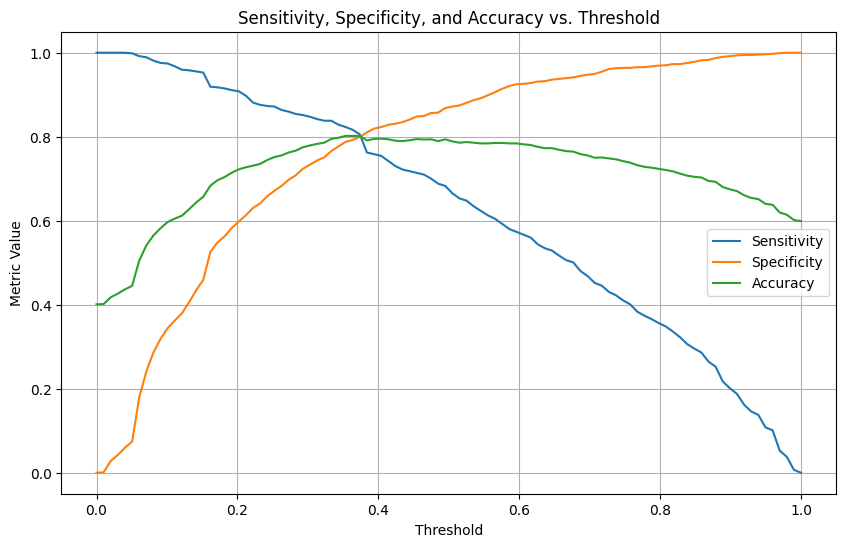

In [59]:
from sklearn.metrics import roc_curve, roc_auc_score

# Fit the logistic regression model
logreg = LogisticRegression()
res = logreg.fit(X_train_selected, y_train)

# Predict probabilities on the test set
y_pred_probs = logreg.predict_proba(X_test_selected)[:, 1]

# Create an array of threshold values
thresholds = np.linspace(0, 1, 100)

# Calculate sensitivity, specificity, and accuracy for each threshold
sensitivity = []
specificity = []
accuracy = []
for threshold in thresholds:
    y_pred = (y_pred_probs >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity.append(tp / (tp + fn))
    specificity.append(tn / (tn + fp))
    accuracy.append((tp + tn) / (tp + tn + fp + fn))

# Plot the sensitivity, specificity, and accuracy curves
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(thresholds, sensitivity, label='Sensitivity')
plt.plot(thresholds, specificity, label='Specificity')
plt.plot(thresholds, accuracy, label='Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.title('Sensitivity, Specificity, and Accuracy vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()


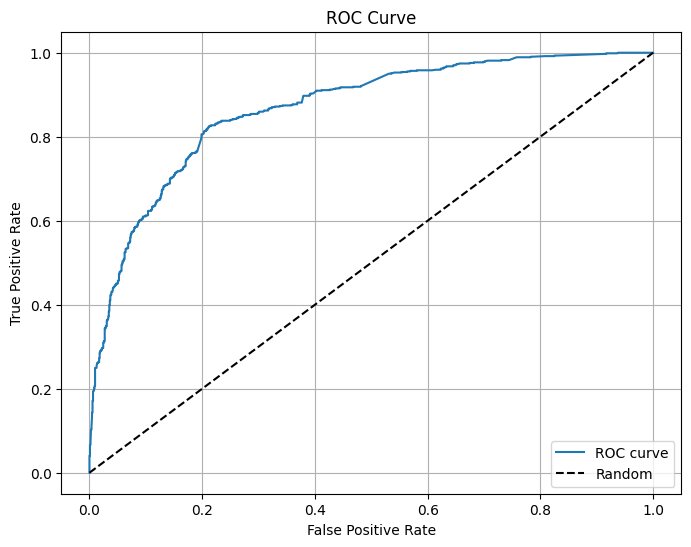

In [60]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [61]:
roc_auc_score(y_test, y_pred_probs)

0.8666795889731277

### area under the curve is 0.87

In [62]:
# Decide the optimal threshold based on the ROC curve
optimal_threshold = thresholds[np.argmax(tpr - fpr)]

# Apply the optimal threshold to predict conversions
y_pred_optimal = (y_pred_probs >= optimal_threshold).astype(int)

# Calculate accuracy and sensitivity at the optimal threshold
tn_optimal, fp_optimal, fn_optimal, tp_optimal = confusion_matrix(y_test, y_pred_optimal).ravel()
accuracy_optimal = (tp_optimal + tn_optimal) / (tp_optimal + tn_optimal + fp_optimal + fn_optimal)
sensitivity_optimal = tp_optimal / (tp_optimal + fn_optimal)

print("Optimal Threshold:", optimal_threshold)
print("Accuracy at Optimal Threshold:", accuracy_optimal)
print("Sensitivity at Optimal Threshold:", sensitivity_optimal)


Optimal Threshold: 0.35126607347505345
Accuracy at Optimal Threshold: 0.8024891774891775
Sensitivity at Optimal Threshold: 0.8259109311740891
